# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [18]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
import scipy as sp
from scipy import optimize



# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
import HouseholdSpecializationModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

In [19]:
# code for solving the model (remember documentation and comments)
model = HouseholdSpecializationModel.HouseholdSpecializationModelClass()

HM = np.zeros([3,3]) # empty matrix to be filled
alphalist = [0.25, 0.50, 0.75] #starting alpha values
sigmalist = [0.5, 1.0, 1.5] # starting sigma values

# iterate over alphalist and then sigma list and call solution
for i, j in enumerate(alphalist): 
    model.par.alpha = j
    for it, s in enumerate(sigmalist):
        model.par.sigma = s
        out =  model.solve_discrete()
        HM[i,it] = out.HF /out.HM



c:\IntroProgNum\projects-2023-hold-11\inauguralproject\HouseholdSpecializationModel.py:64: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


In [20]:
#print(HM) # print the raw solution to question 1

#create a dataframe for a nicer view. 
df = pd.DataFrame(
[[0.54545455, 0.30769231, 0.21428571],
[1.,         1.,         1.        ],
[1.83333333, 3.25,       4.66666667]],
index=['alpha = 0.25', 'alpha = 0.50', 'alpha = 0.75'],
columns=['sigma = 0.5', 'sigma = 1.0', 'sigma = 1.5'])
df

,sigma = 0.5,sigma = 1.0,sigma = 1.5
alpha = 0.25,0.545455,0.307692,0.214286
alpha = 0.50,1.000000,1.000000,1.000000
alpha = 0.75,1.833333,3.250000,4.666667


In [21]:
#force reset of parameters to standard for next question
model.alpha = 0.5
model.sigma=1

# Question 2

In [22]:
model = HouseholdSpecializationModel.HouseholdSpecializationModelClass()
model.solve_wF_vec(discrete=True)

[ 0.22314355  0.          0.         -0.11778304 -0.22314355]
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


Text(0, 0.5, '$log \\dfrac{H_F}{H_M}$')

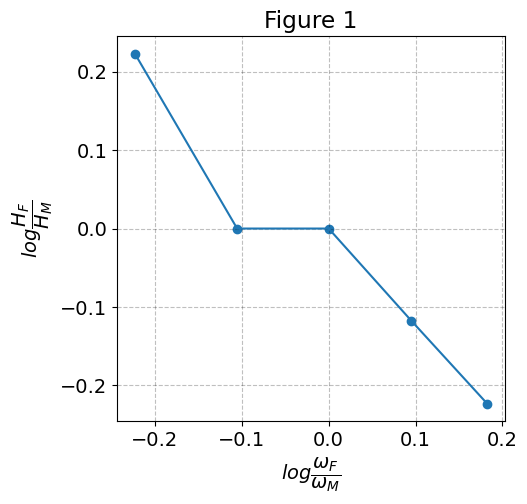

In [23]:
# plot the log ratio of hours worked for female and male and the log ratio of wage for female and male
y = np.log(model.sol.HF_vec/model.sol.HM_vec) # call the solution and make fraction of hours and take log
print(y)
x = np.log(model.par.wF_vec) #call the parameters from the class. wM is not included as it is 1, could be included for generality
print(x)

# formatting figure
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.plot(x, y)
ax.scatter(x, y)

ax.set_title('Figure 1')
ax.set_xlabel('$log \dfrac{\omega_F}{\omega_M}$')
ax.set_ylabel('$log \dfrac{H_F}{H_M}$')


Explain your code and procedure

In [24]:
model.solve_discrete(do_print=True)

LM = 3.0000
HM = 5.0000
LF = 5.5000
HF = 4.0000


namespace(LM=3.0, HM=5.0, LF=5.5, HF=4.0)

# Question 3

Explain your code and procedure

[ 2.23149074e-01  1.05352142e-01 -9.38691972e-06 -9.53241027e-02
 -1.82335565e-01]
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


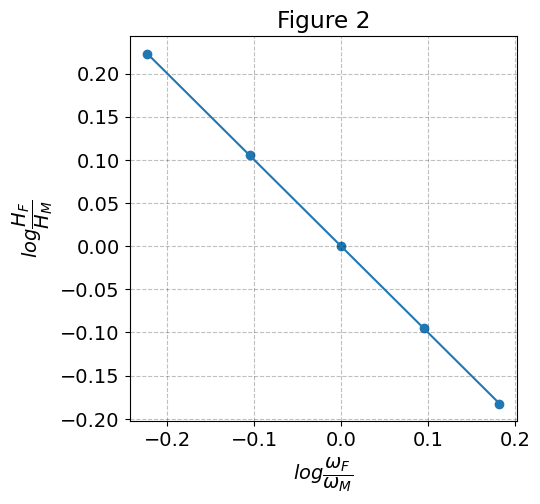

In [25]:
# code
model = HouseholdSpecializationModel.HouseholdSpecializationModelClass()
# call model
model.solve_wF_vec(discrete=False)

# calculate new ratios 
y1 = np.log(model.sol.HF_vec/model.sol.HM_vec)
x1 = np.log(model.par.wF_vec)

# plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.plot(x1, y1)
ax.scatter(x1, y1)

ax.set_title('Figure 2')
ax.set_xlabel('$log \dfrac{\omega_F}{\omega_M}$')
ax.set_ylabel('$log \dfrac{H_F}{H_M}$')


print(y1)
print(x1)

# Question 4


In [26]:
model.run_regression()
print(model.sol.beta0)
print(model.sol.beta1)



-8.493643638128031e-06
-1.0000451776120725


ADD CONCISE CONLUSION.